# Demonstration of the Central Limit Theorem for $\bar{y}$
The Central Limit Theorem(CLT) is one of the fundamental concepts in statistics.  CLT can be stated as 


Let $\bar{y}$ denote the sample mean computed from a random sample of $n$ measurements from a population having a mean, $\mu$, and standard deviation, $\sigma$. 
Let $\mu_\bar{y}$ and $\sigma_\bar{y}$ denote the mean and standard deviation of the sampling distribution of $\bar{y}$. Then
1. $\mu_\bar{y} = \mu$
2. $\sigma_\bar{y} = \sigma / \sqrt{n}$
3. As $n$ grows large, the sampling distribution becomes more normal.
4. When the population distribution is normal, the sample distribution of $\bar{y}$ is exactly normal for any sample size $n$.

The following code block picks $n$ values from the population of DJIA returns.  It then computes the mean of that sample.  That process repeats 5,000 times.  Then the code calculates the mean and standard deviation of the sample means.  We then compare those to the population mean and the expected standard deviation from the CLT.

In [5]:
returns = []
years   = []
with open("../data/djia_returns_1886_2022.csv") as f:
    headerline = f.readline()
    for line in f:
        split_line = line.strip().split(",")
        years.append(int(split_line[0]))
        returns.append(float(split_line[1]))

### Computing Descriptive Statistics

In [6]:
returns_sorted = sorted(returns)
total = sum(returns)
mean  = total / len(returns)
median = returns_sorted[len(returns)//2] if len(returns_sorted)%2 == 1 else (returns_sorted[len(returns)//2 -1 ] + returns_sorted[len(returns)//2])/2
print ("Mean(average):",mean)
print ("Median:",median)
print ("Min:", returns_sorted[0])
print ("Max:", returns_sorted[-1])
print ("Range:", returns_sorted[-1] - returns_sorted[0] )

Mean(average): 7.029416058394162
Median: 7.01
Min: -52.67
Max: 81.66
Range: 134.32999999999998


In [7]:
dif = 0
for x in returns:
    dif += (mean-x)**2
population_variance = dif/len(returns)
std_dev = population_variance**.5
print ("Population Variance:", population_variance)
print ("Population Standard Deviation:",std_dev) 

Population Variance: 409.51651936704127
Population Standard Deviation: 20.236514506382793


In [8]:
## Experiment

Population Mean: 7.029416058394162
Sample mean:  7.050458320000004
Sample Standard Deviation: 4.012542338070681
Estimated Standard Deviation: 4.0473029012765585


[Text(0.5, 0, 'Mean(sample)'), Text(0, 0.5, 'Count')]

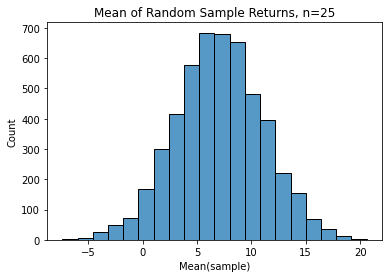

In [10]:
import random
import seaborn as sns
random.seed(42)   # apply a seed so that the result is reproducible.  If not present, defaults to current time  

sample_means = []
n = 25
for y in range(5000):
    picked = []
    for x in range(n):
        picked.append(returns[random.randrange(0,len(returns))])
    sample_means.append(sum(picked)/len(picked))
    
sample_mean = sum(sample_means)/len(sample_means)

dif_sample = 0
for x in sample_means:
    dif_sample += (sample_mean-x)**2
sample_variance = dif_sample/(len(sample_means)-1)
sample_std_dev = sample_variance**.5
est_std_dev = std_dev / (n**.5)

print("Population Mean:",mean)
print("Sample mean: ", sample_mean)
print("Sample Standard Deviation:",sample_std_dev) 
print("Estimated Standard Deviation:", est_std_dev)    
    
axes = sns.histplot(sample_means,bins=20)
axes.set_title("Mean of Random Sample Returns, n="+str(n))
axes.set(xlabel='Mean(sample)', ylabel='Count')

### Distribution of Gaussian Random Values
This final code block pulls 5,000 random values from a Gaussian distribution where the mean and standard deviation are defined from the DJIA return values. [Documentation for random.gauss()](https://docs.python.org/3/library/random.html#random.gauss)

[Text(0.5, 0, 'Random Value'), Text(0, 0.5, 'Count')]

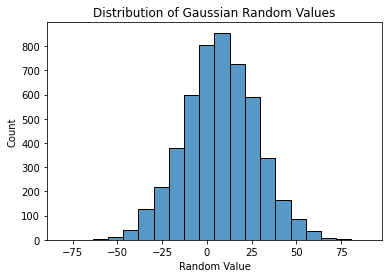

In [11]:
random_values = []
for x in range(5000):
    random_values.append(random.gauss(mean, std_dev))
axes = sns.histplot(random_values,bins=20)
axes.set_title("Distribution of Gaussian Random Values")
axes.set(xlabel='Random Value', ylabel='Count')